<a href="https://colab.research.google.com/github/leodenale/SEOData4RecipeKeywords-GandYT/blob/master/cleaning-youtube-statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json

# Create A Dataframe for all Countries

In [ ]:
#creating a list of all csv files to make loading them easier
csvs = glob.glob('../input/youtube-new/*.{}'.format('csv'))
csvs

['../input/youtube-new/MXvideos.csv',
 '../input/youtube-new/FRvideos.csv',
 '../input/youtube-new/RUvideos.csv',
 '../input/youtube-new/USvideos.csv',
 '../input/youtube-new/DEvideos.csv',
 '../input/youtube-new/INvideos.csv',
 '../input/youtube-new/CAvideos.csv',
 '../input/youtube-new/KRvideos.csv',
 '../input/youtube-new/GBvideos.csv',
 '../input/youtube-new/JPvideos.csv']

In [ ]:
df_list = []
for csv in csvs:
    if csv[21:23] in ['KR', 'MX', 'JP', 'RU']:
        df = pd.read_csv(csv, index_col = 'video_id', engine='python')
    else:
        df = pd.read_csv(csv, index_col = 'video_id')
    df['country'] = csv[21:23] #This gives the 2 letter country code
    df_list.append(df)
    
yt_df = pd.concat(df_list)
yt_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX
klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX
6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canción del principio se llama “Este espíri...,MX
hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,MX
_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,MX


In [ ]:
yt_df.info()
#From the .head() sample and the .info() description, we can see that there are two date/time related columns
#We should change these columns from dtype = object to dtype = datetime

<class 'pandas.core.frame.DataFrame'>
Index: 375942 entries, SbOwzAl9ZfQ to 2IEWv23oa9E
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trending_date           375942 non-null  object
 1   title                   375942 non-null  object
 2   channel_title           375942 non-null  object
 3   category_id             375942 non-null  int64 
 4   publish_time            375942 non-null  object
 5   tags                    375942 non-null  object
 6   views                   375942 non-null  int64 
 7   likes                   375942 non-null  int64 
 8   dislikes                375942 non-null  int64 
 9   comment_count           375942 non-null  int64 
 10  thumbnail_link          375942 non-null  object
 11  comments_disabled       375942 non-null  bool  
 12  ratings_disabled        375942 non-null  bool  
 13  video_error_or_removed  375942 non-null  bool  
 14  description             35

In [ ]:
#Now we will add a category column using the json files provided
yt_df['category_id'] = yt_df['category_id'].astype(str)

category_ids = {}

#Some of the json files were missing one category label so I had to use the US version
#Thus we only need to unpack one json file to fill out our dictionary

j = open('../input/youtube-new/US_category_id.json', 'r')
json_data = json.load(j)
for category in json_data['items']:
    category_ids[category['id']] = category['snippet']['title']

yt_df.insert(4,'category', yt_df['category_id'].map(category_ids))
print(yt_df['category'].unique())
yt_df.head()

['Entertainment' 'People & Blogs' 'News & Politics' 'Howto & Style'
 'Music' 'Comedy' 'Sports' 'Autos & Vehicles' 'Film & Animation'
 'Nonprofits & Activism' 'Education' 'Science & Technology' 'Gaming'
 'Pets & Animals' 'Travel & Events' 'Shows' 'Movies' 'Trailers']


,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,
SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,Entertainment,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX
klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,People & Blogs,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX
6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,News & Politics,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canción del principio se llama “Este espíri...,MX
hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,News & Politics,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,MX
_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,Howto & Style,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,MX


In [ ]:
#Changing the trending date and publish time to datetime
#Let's also split the publish time column into a publish date and a publish time column
#Notice that the format for trending date is Year.day.month
#the format for publish time is Year-month-day (T)Hour:Minute:Second.milisecond(Z)
from datetime import datetime
yt_df['trending_date'] = pd.to_datetime(yt_df['trending_date'], errors = 'coerce',format = '%y.%d.%m')
yt_df['publish_time'] = pd.to_datetime(yt_df['publish_time'], errors = 'coerce', format = '%Y-%m-%dT%H:%M:%S.%fZ')
yt_df.insert(5,'publish_date', yt_df['publish_time'].dt.date)
yt_df['publish_time'] = yt_df['publish_time'].dt.time
yt_df.info()
yt_df[['trending_date', 'publish_date', 'publish_time']].head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 375942 entries, SbOwzAl9ZfQ to 2IEWv23oa9E
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   trending_date           375942 non-null  datetime64[ns]
 1   title                   375942 non-null  object        
 2   channel_title           375942 non-null  object        
 3   category_id             375942 non-null  object        
 4   category                375942 non-null  object        
 5   publish_date            375942 non-null  object        
 6   publish_time            375942 non-null  object        
 7   tags                    375942 non-null  object        
 8   views                   375942 non-null  int64         
 9   likes                   375942 non-null  int64         
 10  dislikes                375942 non-null  int64         
 11  comment_count           375942 non-null  int64         
 12  thumbnail_link      

,trending_date,publish_date,publish_time
video_id,,,
SbOwzAl9ZfQ,2017-11-14,2017-11-13,06:06:22
klOV6Xh-DnI,2017-11-14,2017-11-13,05:11:58
6L2ZF7Qzsbk,2017-11-14,2017-11-13,17:00:02
hcY52MFWMDM,2017-11-14,2017-11-13,03:47:10
_OXDcGPVAa4,2017-11-14,2017-11-13,19:17:48
Q9kK6NWZR1U,2017-11-14,2017-11-12,20:17:38
c9VTD3n_IDs,2017-11-14,2017-11-13,07:00:03
XzULSsZYMRc,2017-11-14,2017-11-13,06:18:23
uijjYNtl_UM,2017-11-14,2017-11-12,19:54:12


In [ ]:
#It looks like there are videos where the video id is missing
print(yt_df.reset_index()['video_id'].str.startswith('#').sum())

#Let us remove these rows
yt_df = yt_df.reset_index()
yt_df = (yt_df[~yt_df['video_id'].str.startswith('#')])
yt_df = yt_df.set_index('video_id')
print(yt_df.reset_index()['video_id'].str.startswith('#').sum())

2319
0


 # Data Analysis

## Question 1: What Types of Videos Trend Most Often

In [ ]:
countries = yt_df['country'].unique()
countries

array(['MX', 'FR', 'RU', 'US', 'DE', 'IN', 'CA', 'KR', 'GB', 'JP'],
      dtype=object)

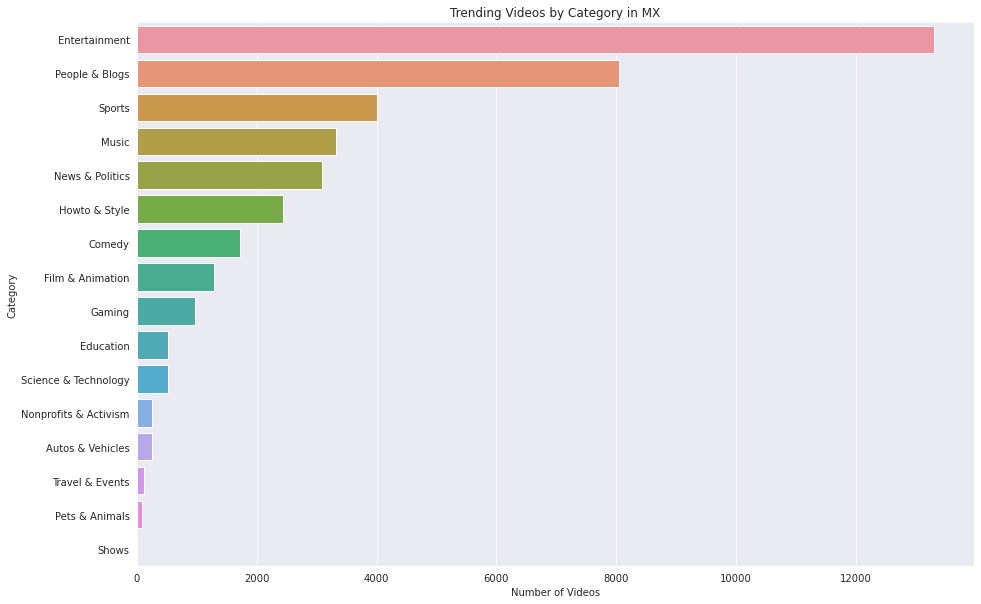

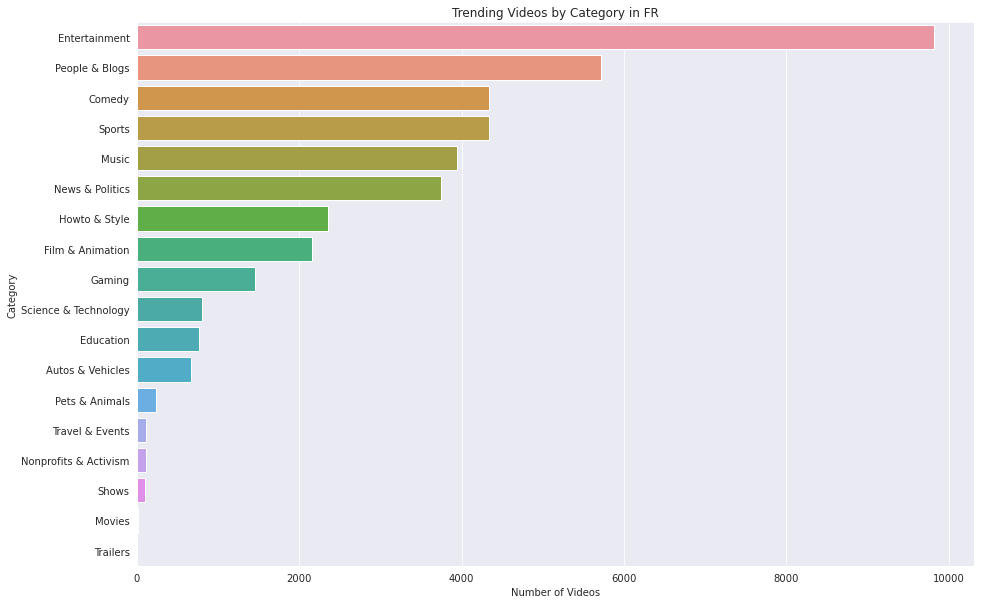

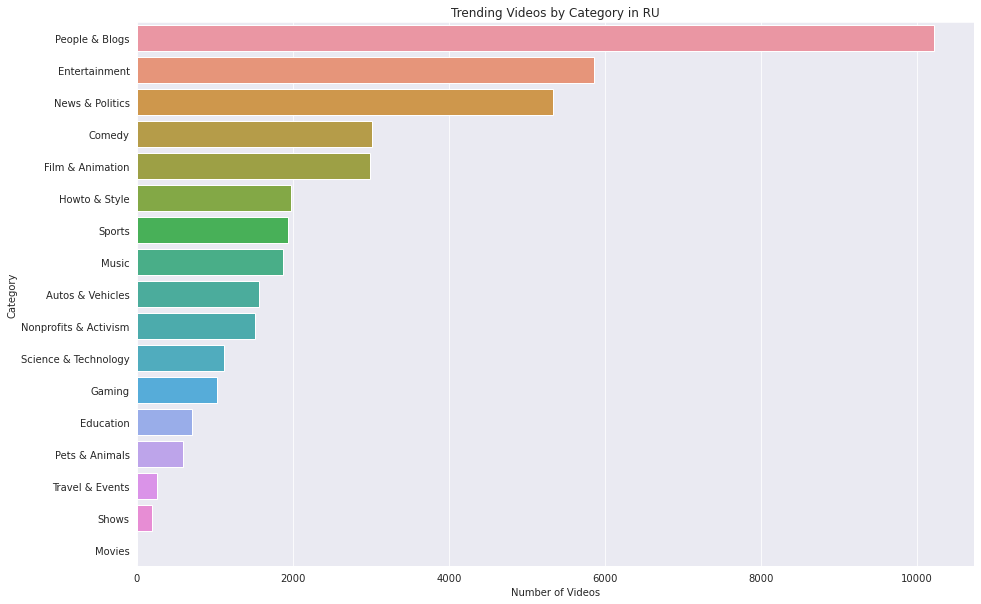

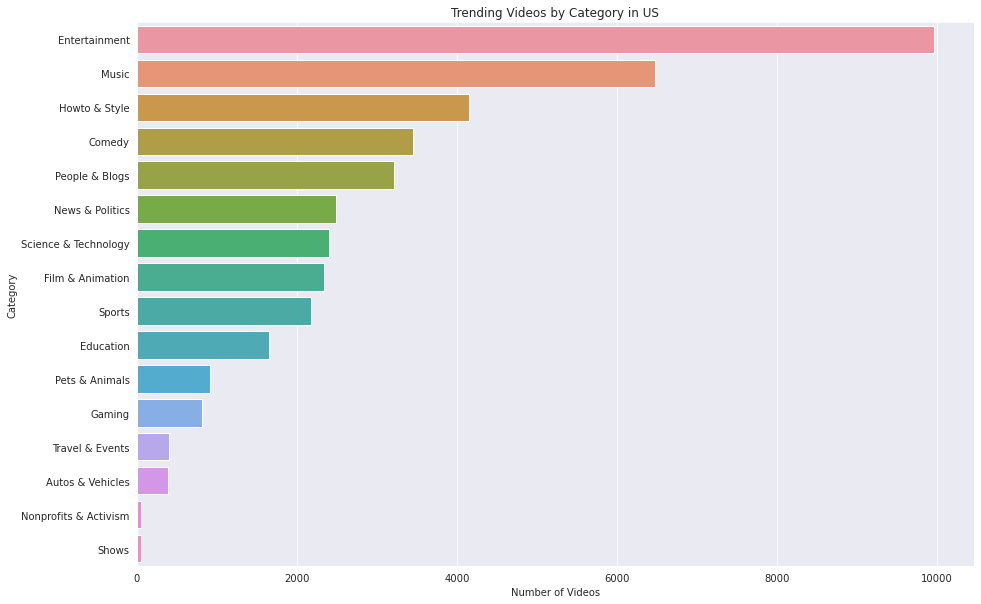

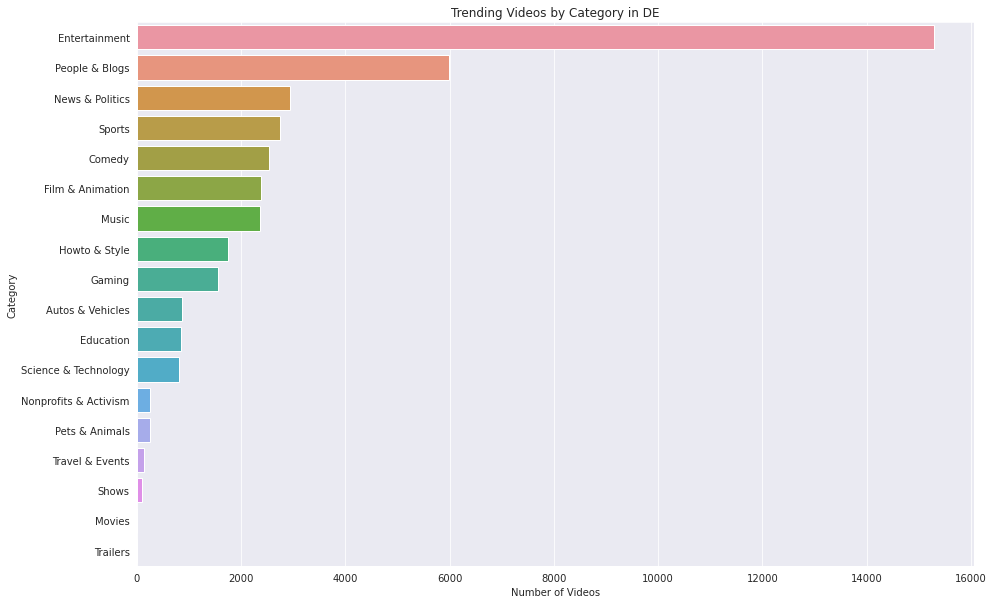

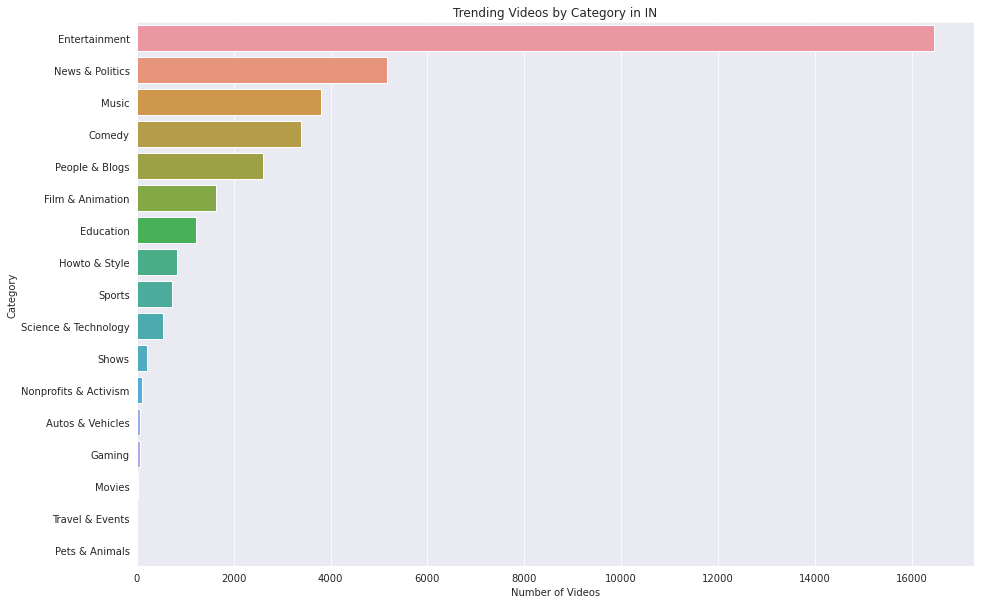

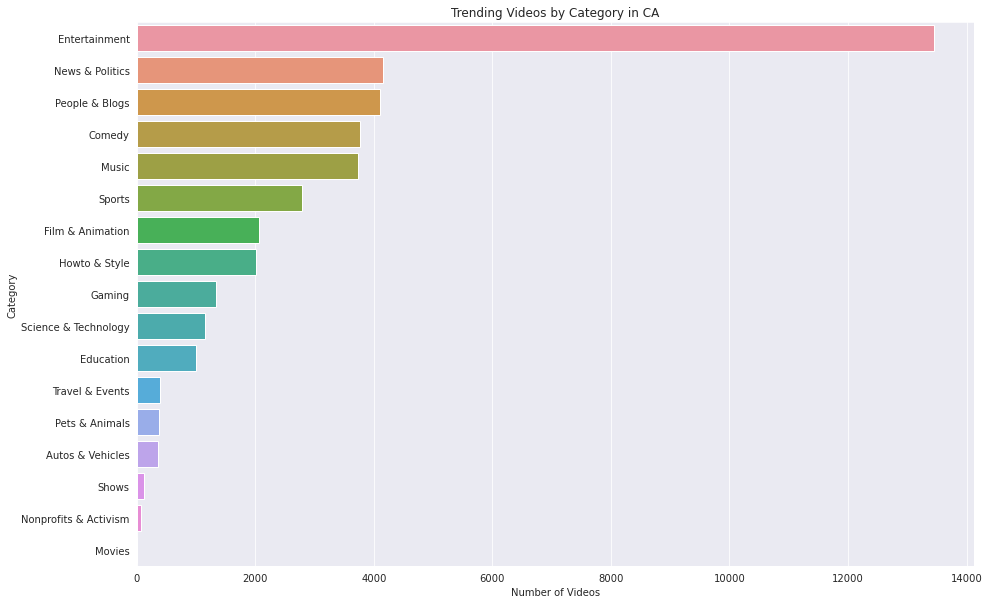

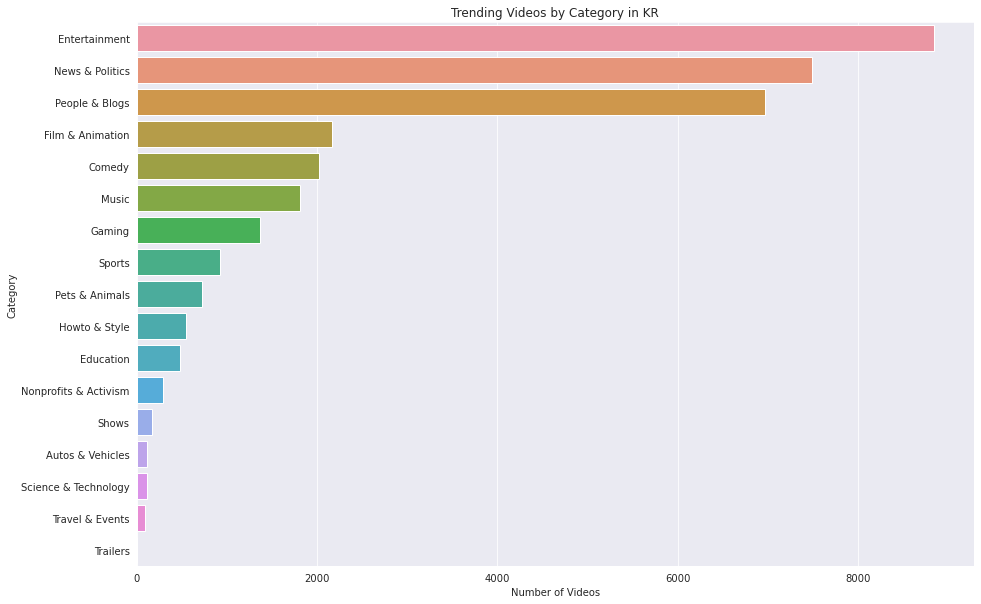

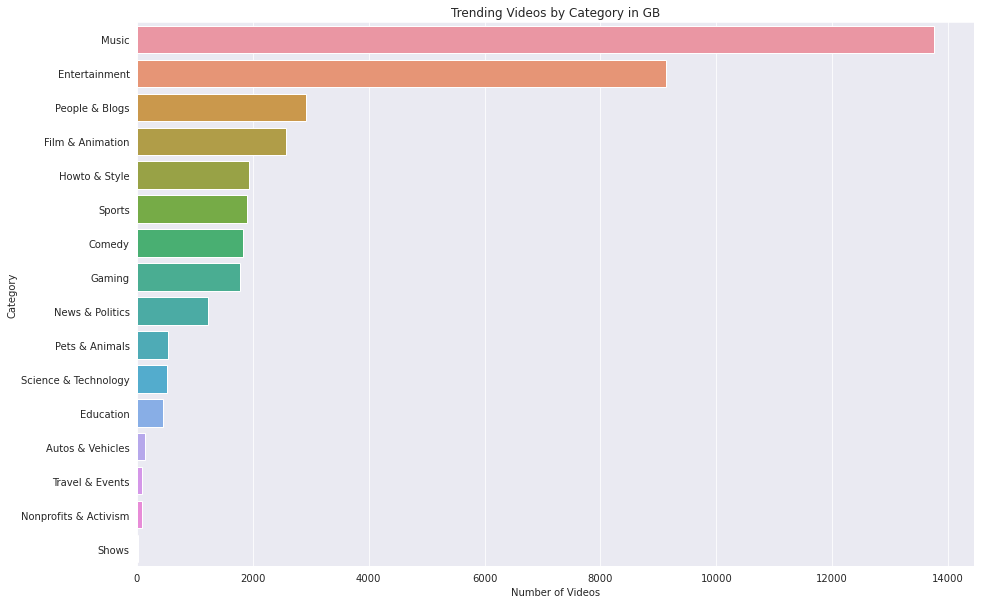

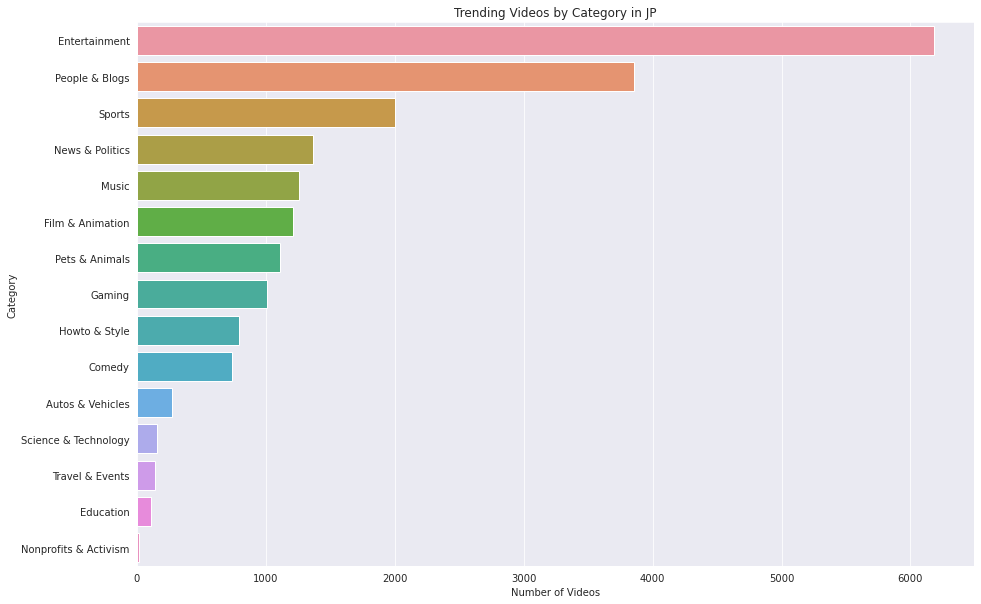

In [ ]:
for country in countries:
    cat_counts_df = yt_df[yt_df['country']==country]['category'].value_counts().reset_index()
    plt.figure(figsize=(15,10))
    sns.set_style("darkgrid")
    ax = sns.barplot(y=cat_counts_df['index'],x=cat_counts_df['category'], data=cat_counts_df,orient='h')
    plt.xlabel("Number of Videos")
    plt.ylabel("Category")
    plt.title(f'Trending Videos by Category in {country}')
    plt.show()

**Insights:** As we can see, the Entertainment category is the most heavily trending category in the majority of the countries in this dataset. Even in the few countries where this is not the case, the most trending categories are very similar in concept, such as Music in Great Britain and People/Blogs in Russia.

Another interesting observation is that News/Politics are generally pretty high up for most countries (usually top 5). However, in Britain, News/Politics is ranked 9th. This is surprising given the state of british politics in the past few years. Perhaps this trend is an indiciation that British residents used YouTube as a way to relax and get away from the political events of this time period.

## Question 2: Videos From Which Category Trend For the Longest

In [ ]:
#Reset the index to make video ID a separate column again, then filter out all but the first instance of each video
first_trending = yt_df.reset_index().drop_duplicates('video_id', keep = 'first').set_index('video_id')

#Find the difference between the date published and the first trending date
first_diff = first_trending['trending_date'].astype('datetime64[ns]') - first_trending['publish_date'].astype('datetime64[ns]')
first_diff = first_diff.reset_index()
first_diff.columns = ['video_id', 'pub_to_trend_first']

#Store the time from publishing to trending in a dictionary
pub_to_trend_dict = {}
for row in first_diff.itertuples():
    pub_to_trend_dict[str(row[1])] = row[2].days

#Find the most recent instacne of trending
last_trending = yt_df.reset_index().drop_duplicates('video_id', keep = 'last').set_index('video_id')
last_diff = last_trending['trending_date'].astype('datetime64[ns]') - last_trending['publish_date'].astype('datetime64[ns]')
last_diff = last_diff.reset_index()
last_diff.columns = ['video_id', 'pub_to_trend_last']
yt_df = yt_df.reset_index()

pub_to_trend_dict2 = {}
for row in last_diff.itertuples():
    pub_to_trend_dict2[str(row[1])] = row[2].days

#insert columns for the publication-trending time differences
yt_df.insert(4, 'pub_to_trend_last', yt_df['video_id'].map(pub_to_trend_dict2))
yt_df.insert(4, 'pub_to_trend', yt_df['video_id'].map(pub_to_trend_dict))
yt_df.insert(4, 'trending_duration', 0)

yt_df['trending_duration'] = abs(yt_df['pub_to_trend_last'] - yt_df['pub_to_trend']) +1
yt_df.set_index('video_id')[['pub_to_trend', 'trending_duration']].sort_values('trending_duration', ascending = False).head()

,pub_to_trend,trending_duration
video_id,,
kZete48ZtsY,1,49
kZete48ZtsY,1,49
kZete48ZtsY,1,49
kZete48ZtsY,1,49
kZete48ZtsY,1,49


In [ ]:
yt_df[['category','trending_duration']].head()

,category,trending_duration
0,Entertainment,2
1,People & Blogs,1
2,News & Politics,2
3,News & Politics,2
4,Howto & Style,2


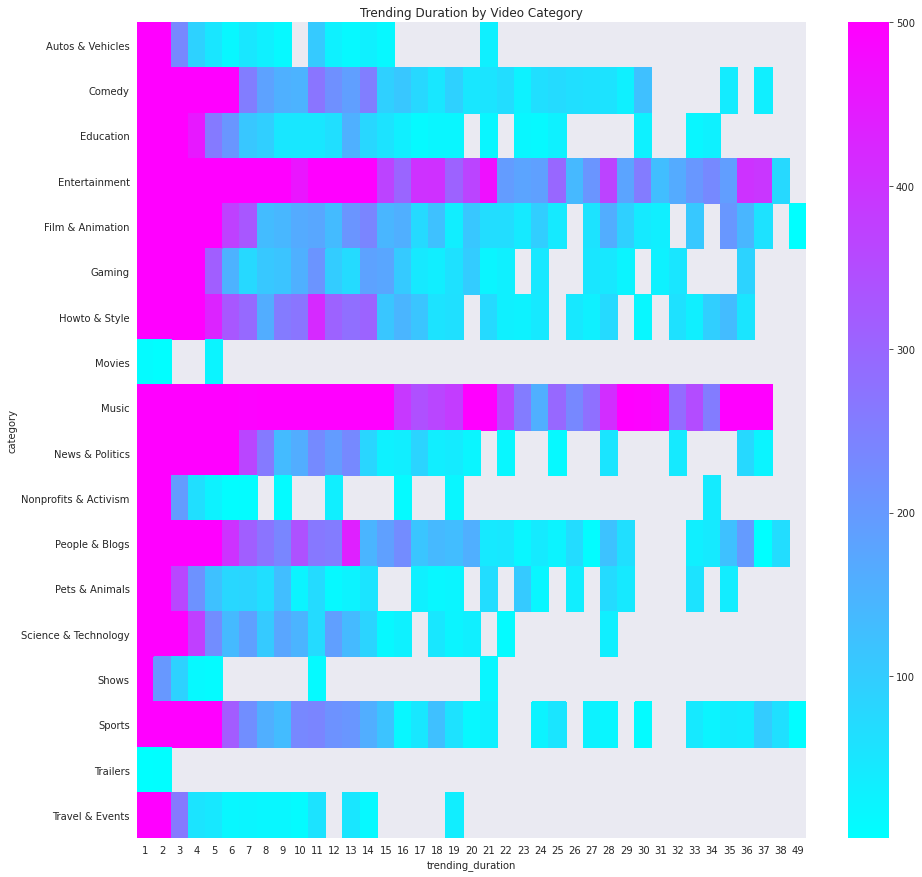

In [ ]:
trending_time_category = yt_df.groupby(['category', 'trending_duration']).count()['video_id'].unstack().clip(upper = 500)
yt_df = yt_df.set_index('video_id')
plt.figure(figsize=(15,15))
sns.set_style("dark")
sns.heatmap(trending_time_category, cmap = 'cool')
plt.title('Trending Duration by Video Category')
plt.show()

**Insights:** From this heatmap, we can see a few things. First, we see that very few videos trend for more than a few days. For most categories, videos that trend for long periods of time are few and far between. The exception to this rule seems to be the Music category. Music videos trend for a long time and in higher frequencies than other types of videos. This makes sense, considering people are much more likely to play a catchy song over and over again than a 2hr long movie.

## Question 3: Are Trends in One Country Connected to Trends in Other Countries?

In [ ]:
#Lets create a dataframe that tracks the number of times each video trends, grouped by country
trend_count = yt_df.groupby([yt_df.index, 'country']).count()['title'].sort_values(ascending=False).reset_index()
trend_count.head()

,video_id,country,title
0,NooW_RbfdWI,GB,38
1,BhIEIO0vaBE,GB,38
2,2z3EUY1aXdY,GB,38
3,u_C4onVrr8U,GB,38
4,Il-an3K9pjg,GB,38


In [ ]:
#Create a dataframe to calculate the correlation between countries
corr_df = trend_count.pivot(index='video_id', columns = 'country', values = 'title')
corr_df = corr_df.fillna(0).astype(int)
corr_df['total'] = corr_df.sum(axis=1)
corr_df

country,CA,DE,FR,GB,IN,JP,KR,MX,RU,US,total
video_id,,,,,,,,,,,
--1skHapGUc,0,0,0,0,0,0,0,1,0,0,1
--2K8l6BWfw,0,0,1,0,0,0,0,0,0,0,1
--45ws7CEN0,1,0,0,0,0,0,0,1,1,0,3
--6vcer7XYQ,0,0,0,0,0,0,0,3,0,0,3
--728h8mnDY,0,0,2,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
zzuI1sona1M,0,0,0,0,0,0,0,0,1,0,1
zzvWC_pDiIk,0,0,0,0,0,0,0,0,1,0,1
zzxLG6R5cHI,0,0,0,0,0,0,0,1,0,0,1


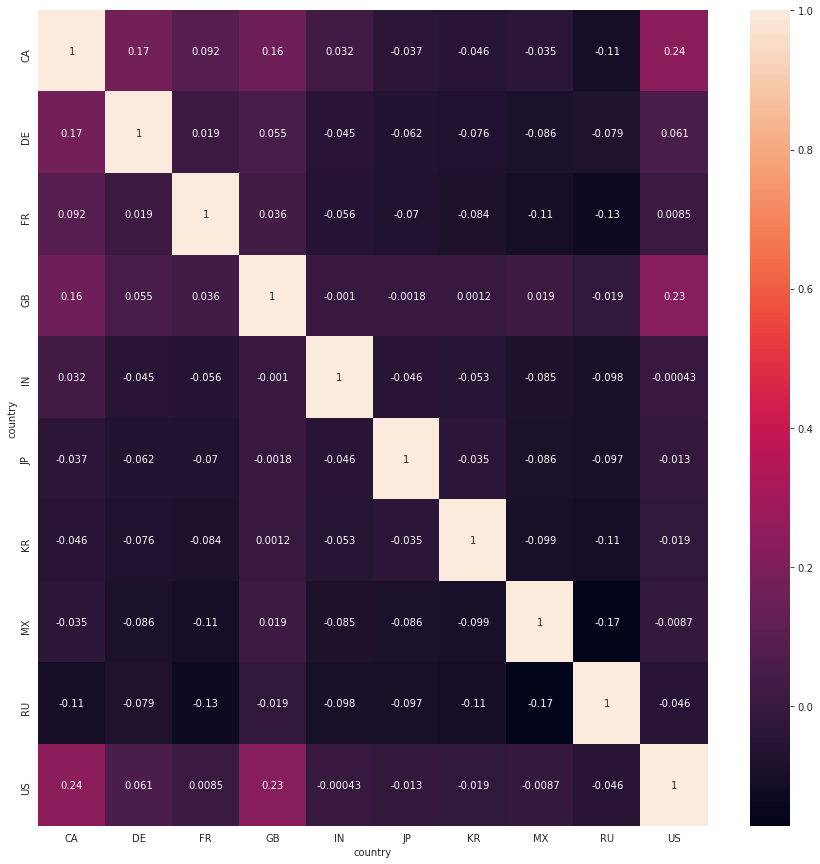

In [ ]:
countries = [c for c in corr_df.columns if c != 'total']

corr_mat = corr_df[countries].corr()

fig = plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, annot = True)
plt.show()

**insights:** From this heatmap, we can see that there is generally very little correlation between trending vidoes between countries. However, we can see that the correlation is higher between the US, Canada, and Great Britain. This is most likely because these countries are all English-speaking countries, thus making it easier for videos to spread throughout all three countries. However, it is also interesting that the correlation between France and Canada is pretty weak. I would expect a higher correlation given the fact that French is an official Canadian language.

## Question 4: Do Different Countries Interact with Trending Videos Differently?
### Note: We will count interaction based on views, likes, dislikes, and comments

In [ ]:
yt_df.info()
#looks like the interactions stats are already integers. Dope

<class 'pandas.core.frame.DataFrame'>
Index: 373623 entries, SbOwzAl9ZfQ to 2IEWv23oa9E
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   trending_date           373623 non-null  datetime64[ns]
 1   title                   373623 non-null  object        
 2   channel_title           373623 non-null  object        
 3   trending_duration       373623 non-null  int64         
 4   pub_to_trend            373623 non-null  int64         
 5   pub_to_trend_last       373623 non-null  int64         
 6   category_id             373623 non-null  object        
 7   category                373623 non-null  object        
 8   publish_date            373623 non-null  object        
 9   publish_time            373623 non-null  object        
 10  tags                    373623 non-null  object        
 11  views                   373623 non-null  int64         
 12  likes               

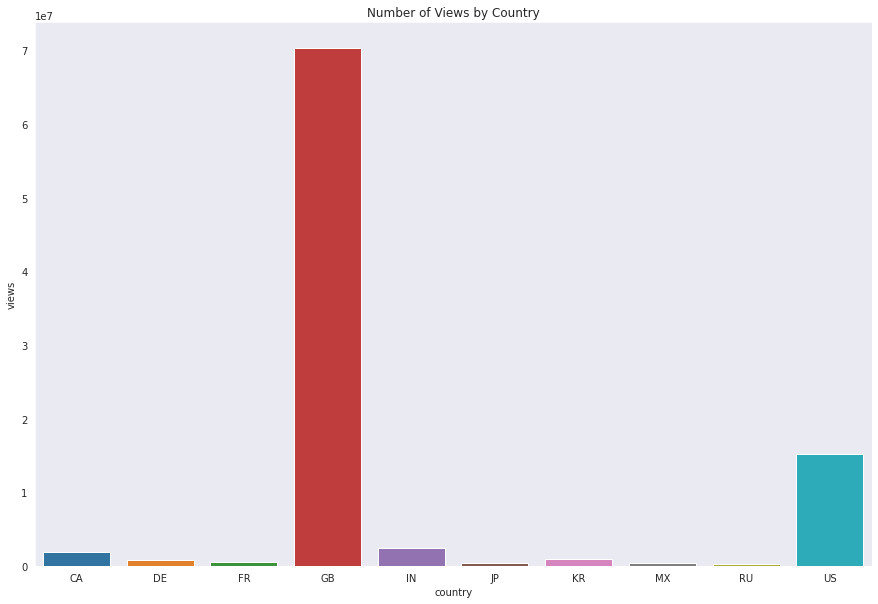

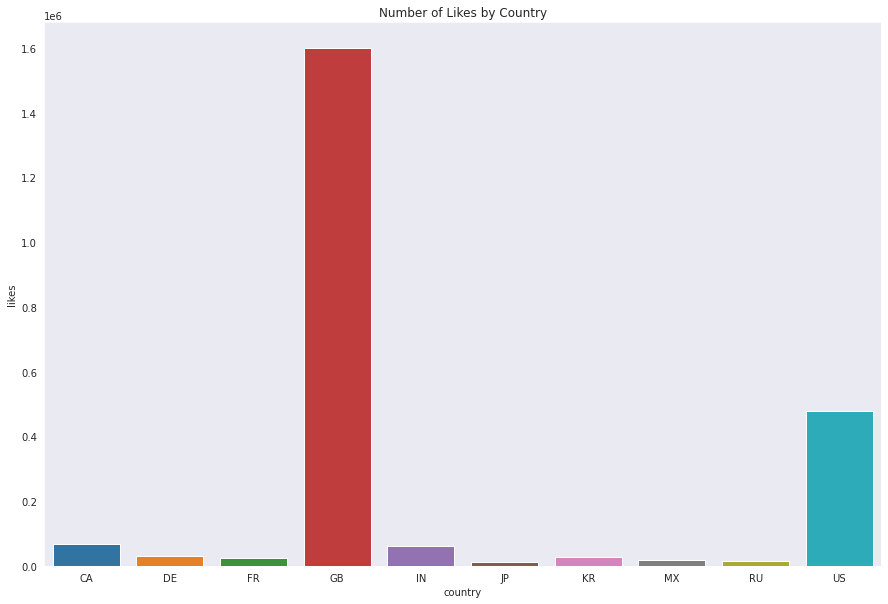

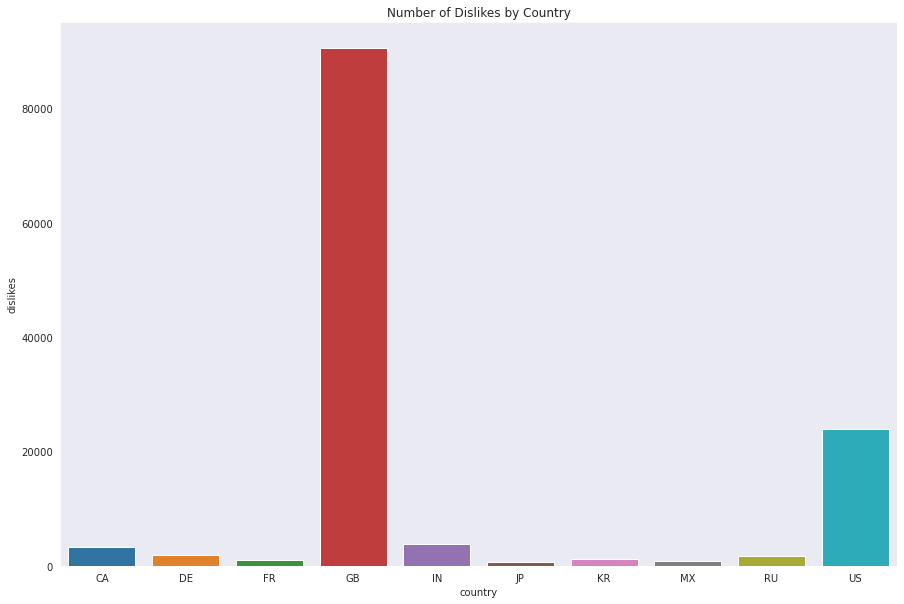

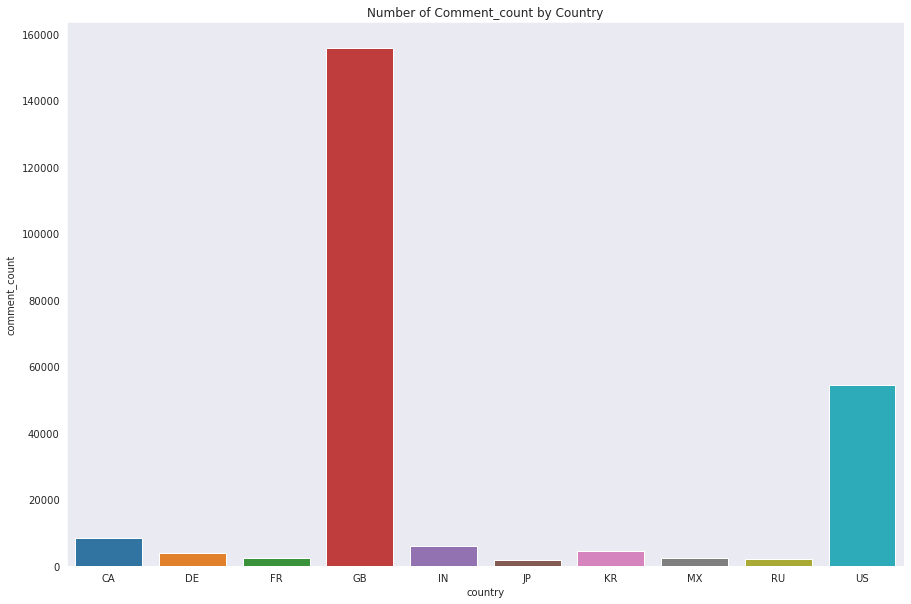

In [ ]:
#List of interactions and the number of countries we have
interactions = ['views', 'likes', 'dislikes', 'comment_count']
country_count = len(countries)

#Creating a dataframe of all the info we want to graph
interact_df = yt_df.groupby(['country'])[interactions].sum()
interact_df['unique_counts'] = pd.DataFrame(yt_df.reset_index().groupby(['country'])['video_id'].nunique())
#Diving the total interaction counts by the number of unique trending videos in each country
interact_df = interact_df.apply(lambda x: x/interact_df['unique_counts'])
interact_df = interact_df.drop('unique_counts', axis=1)


for column in interact_df.columns:
    fig = plt.figure(figsize=(15,10))
    sns.barplot(x = interact_df.index, y = column, data = interact_df)
    plt.title('Number of {} by Country'.format(column.capitalize()))
    plt.show()

**Insights:** Well, this is sorta strange isn't it? British videos seem to have much higher levels of interaction compared to all other countries. The US is second in all categories but it's not even closer. This begs the question, why are trending videos in Britain being interacted with so much more than other countries

## Question 5: How Long do Videos Trend in Each Country

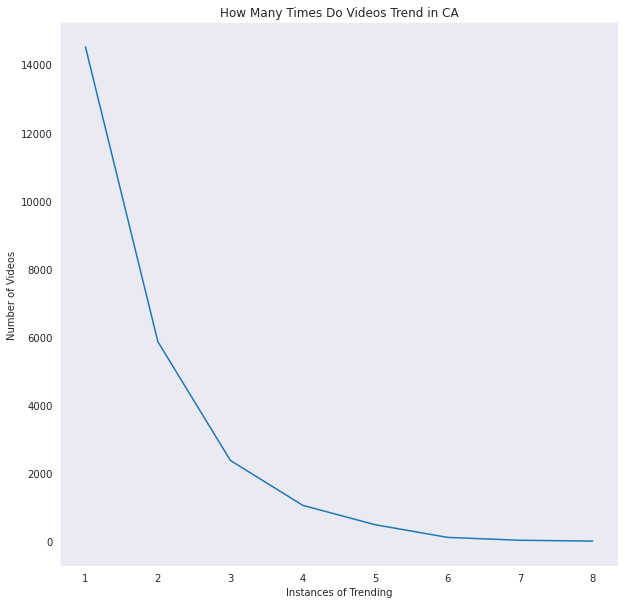

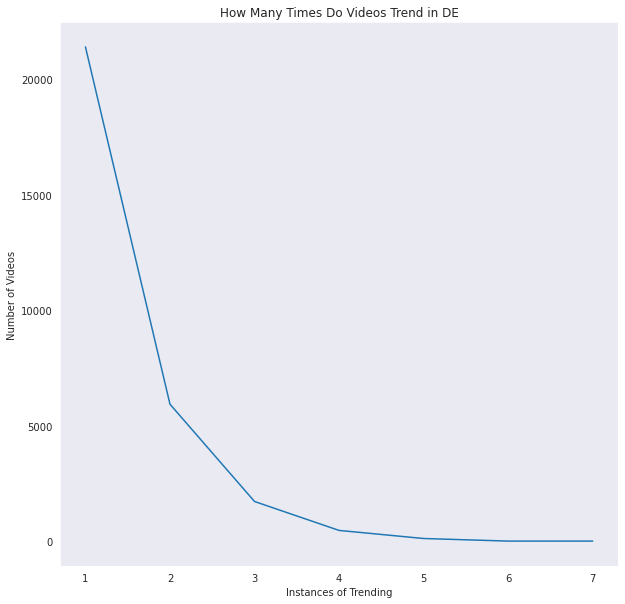

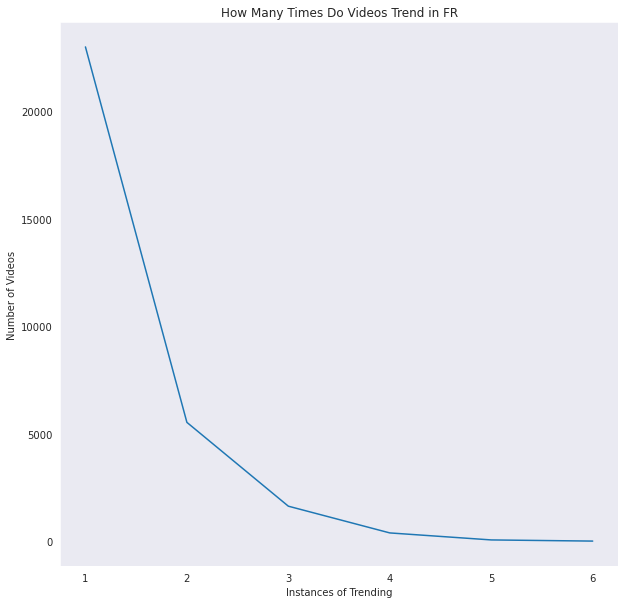

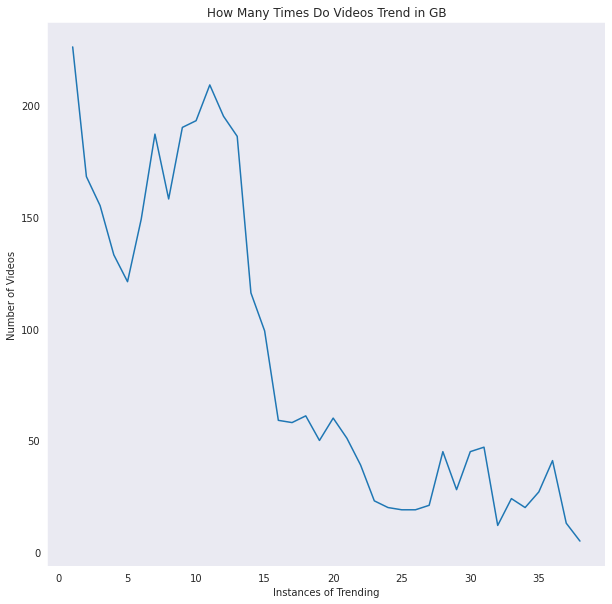

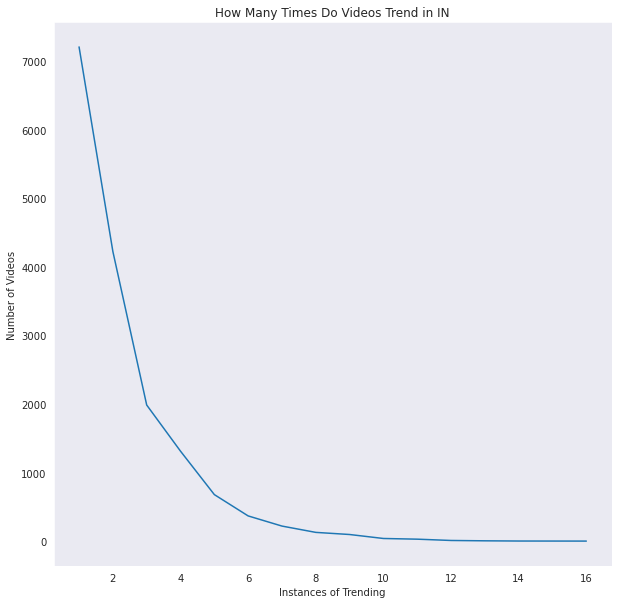

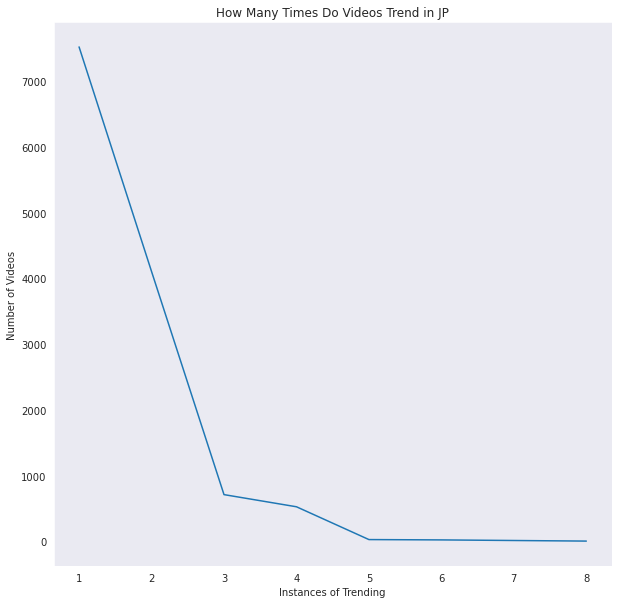

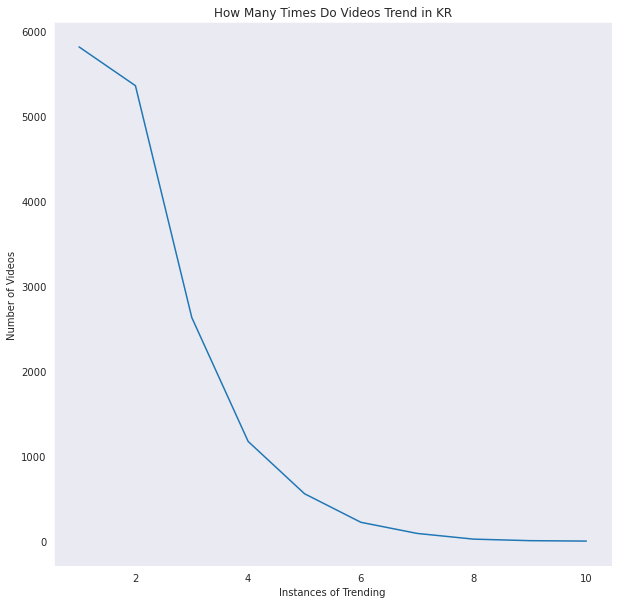

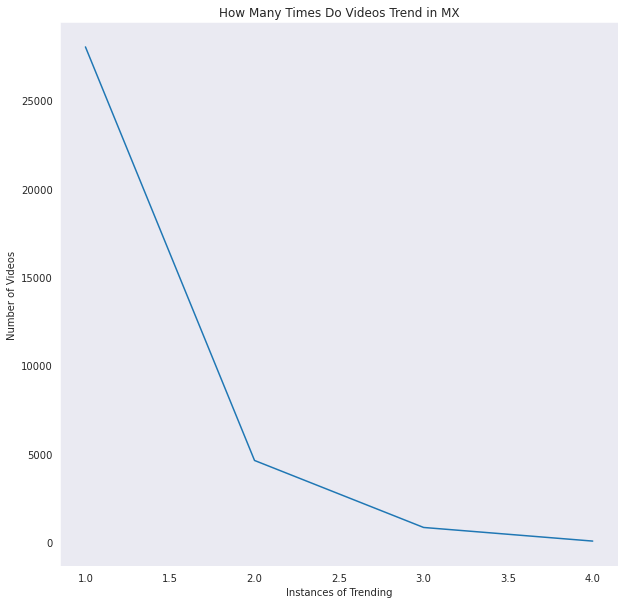

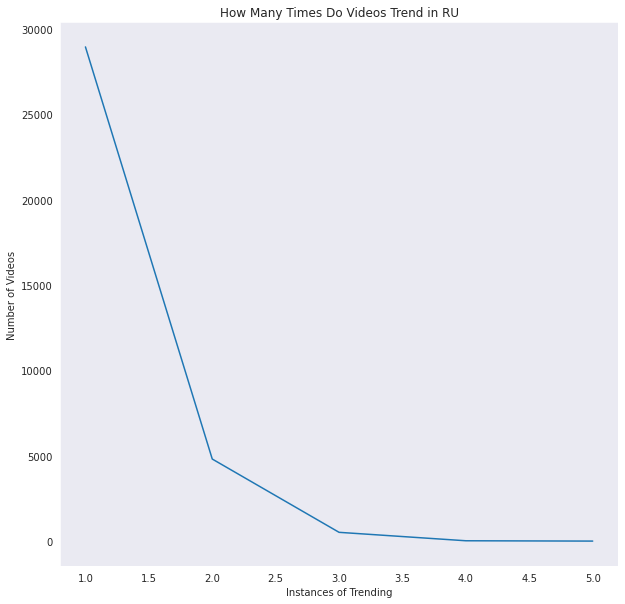

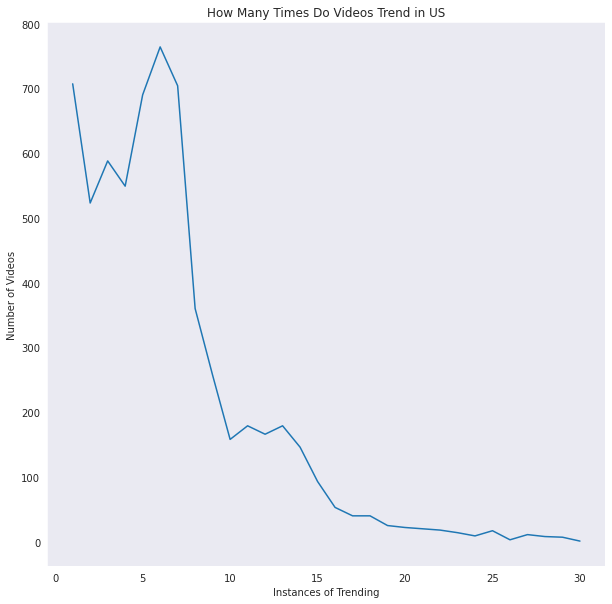

In [ ]:
t_counts_country = pd.DataFrame(trend_count.groupby(['country'])['title'].value_counts())
t_counts_country.columns = ['title_counts']
t_counts_country = t_counts_country.reset_index()

for country in t_counts_country['country'].unique():
    fig = plt.figure(figsize=(10,10))
    sns.lineplot(x='title', y='title_counts', data = t_counts_country[t_counts_country['country']==country])
    plt.title(f'How Many Times Do Videos Trend in {country}')
    plt.xlabel('Instances of Trending')
    plt.ylabel('Number of Videos')
    plt.show()

**Insights:** I think these graphs help us understand why british videos get so much more interaction compared to videos in other regions. Videos trend for much longer in Great Britain than in any other region in this dataset. During their time on the trending page, these british videos probably get a lot more attention and interaction than the videos of other countries, which fade out of the spotlight relatively quickly.

## Question 6: 
### a)Which Types of Videos are Most Liked? Most Disliked?
### b)Which Types of Videos have the Best Like/Dislike Ratio?

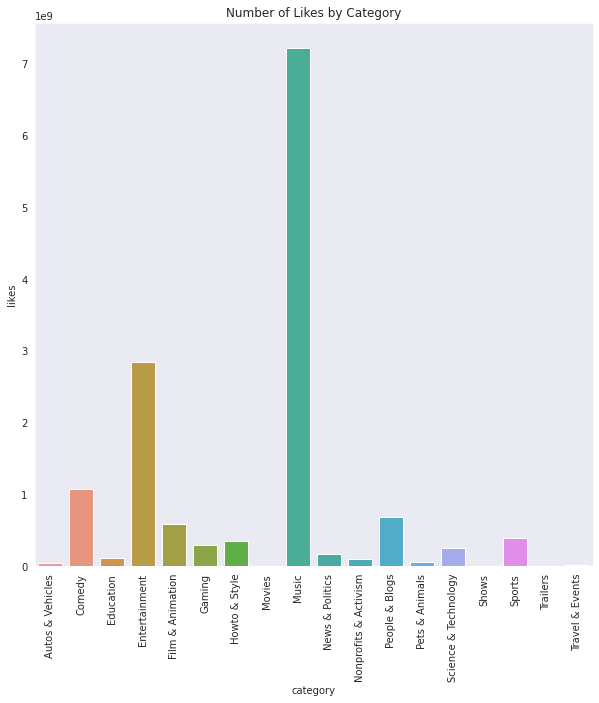

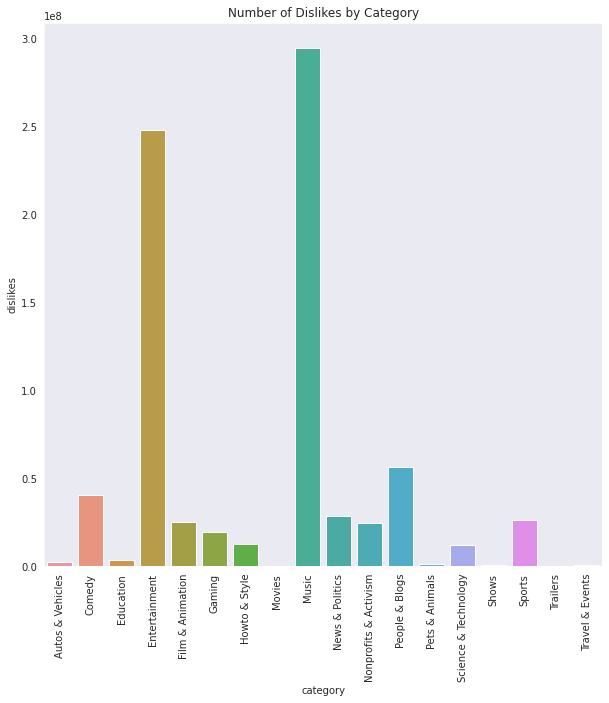

In [ ]:
like_dislike = yt_df.groupby(['category'])[['likes', 'dislikes']].sum()
for col in like_dislike.columns:
    fig = plt.figure(figsize=(10,10))
    sns.barplot(x = like_dislike.index, y = like_dislike[col], data = like_dislike)
    plt.xticks(rotation = 'vertical')
    plt.title(f'Number of {col.capitalize()} by Category')
    plt.show()

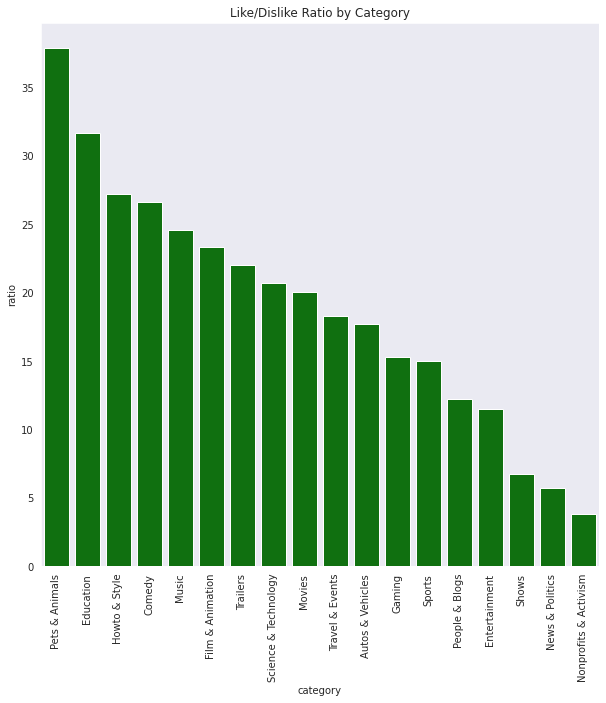

In [ ]:
like_dislike['ratio'] = like_dislike['likes']/like_dislike['dislikes']
like_dislike = like_dislike.sort_values(by='ratio', ascending=False)
#This makes the bars red if they have fewer likes than dislikes, and green otherwise
clrs = ['red' if (x < 1) else 'green' for x in like_dislike['ratio'].values ]

fig = plt.figure(figsize=(10,10))
sns.barplot(x = like_dislike.index, y = like_dislike['ratio'], data = like_dislike, palette = clrs)
plt.xticks(rotation = 'vertical')
plt.title('Like/Dislike Ratio by Category')
plt.show()

**Insight:** Although music videos have the highest number of likes compared to any other category, they also have the most dislikes. This makes sense, as music evokes a lot of emotion from people. Also, songs and music videos can, and often do, carry very heavy political, social, and/or emotional themes, which can garner a lot of love but also a lot of hate. Despite getting a relatively low number of likes, pet videos have, by far, the best like/dislike ratio. This also makes sense, due to the fact that animal videos are usually just cute animals doing silly things.

## Question 7: What Categories Are the Most Controversial

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from itertools import chain
import re

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#let's create a list of stopwords from all of the avialable languages in nltk
languages = ['english','french','german','russian','spanish']
stopwords_list = [stopwords.words(lang) for lang in languages]
stopwords_list = list(chain(*stopwords_list))

#calculate the polarities for each category based on video tags

polarities = []
cat_list = yt_df['category'].unique()

for cat in cat_list:
    
    tag_words = yt_df[yt_df['category']==cat]['tags'].str.lower().str.cat(sep='|')
    tag_words = re.sub('[^A-Za-z]+', ' ', tag_words)
    token_words = word_tokenize(tag_words)
    
    filtered_tags = [word for word in token_words if not word in stopwords_list]
    filtered_tags = [word for word in filtered_tags if len(word)>2]
    filtered_tags = [word for word in filtered_tags if not word.isdigit()]
    
    word_distribution = nltk.FreqDist(filtered_tags)
    freq_df = pd.DataFrame(word_distribution.most_common(1000), columns=['word','freq'])
    
    compound=.0
    for word in freq_df['word'].head(1000):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']
    polarities.append(compound)

In [ ]:
polarities = [12.5359,10.352399999999996,7.096599999999999,9.528299999999998,16.047199999999997,7.9980999999999955,15.507100000000001,5.694699999999998,1.9956000000000005,-6.599499999999999,
6.049099999999998,9.764000000000005,1.4337,12.204700000000004,9.140699999999994,3.0110000000000006,1.85,0.0]

cat_list = yt_df['category'].unique()

In [ ]:
tag_sentiments = pd.concat([pd.DataFrame(cat_list),pd.DataFrame(polarities)], axis=1)
tag_sentiments.columns = ['category','polarity']
tag_sentiments = tag_sentiments.sort_values('polarity').reset_index()

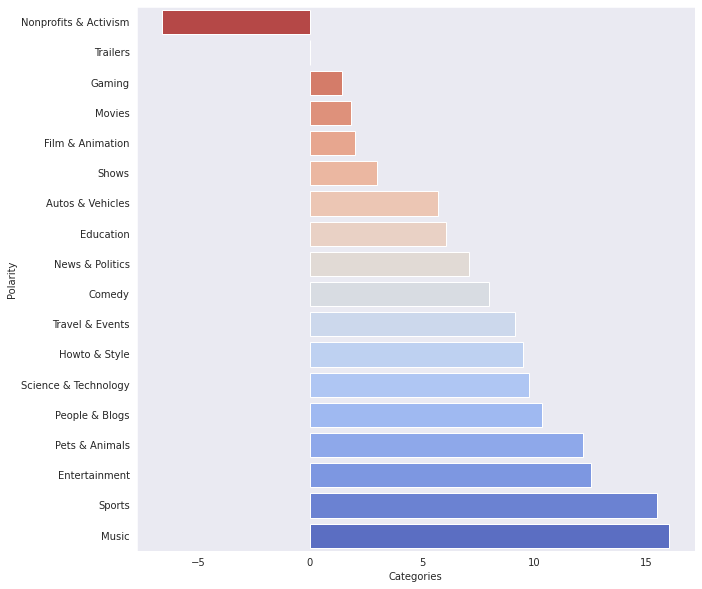

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x='polarity', y='category', data=tag_sentiments, orient='h', palette='coolwarm_r')
plt.xlabel('Categories')
plt.ylabel('Polarity')
plt.show()

**Insight:** After filtering out all of the stopwords in the tags, we find that the sentiments expressed within the tags for each category. The way to interpret this graph is that negative polarity means that there are more negative sentiments expressed in the videos of that category, while positive polarity means there are more positive sentiments expressed. News and politics is the most negative category, which is to be expected. A surprising thing to see is that pets and animals is 4th in terms of positive sentiment, despite being the category with the highest ratio of likes to dislike. I would've expected pets and animals to be the number 1 or 2 stop on this graph. In general, it seems like all categories barring politics are tagged in a positive way, which is pretty nice to see.

## Question 8: How Has the Volume of Trending Videos Changed Over Time

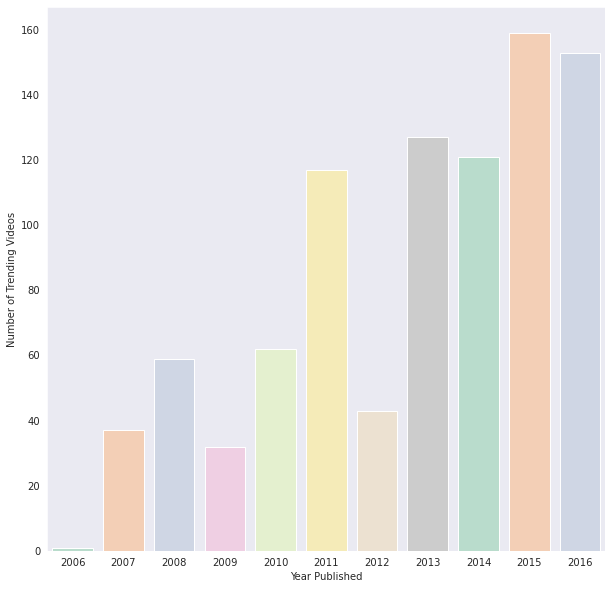

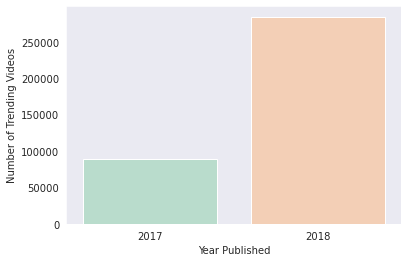

In [ ]:
year_counts = yt_df['publish_date'].apply(lambda x: x.year).reset_index()
year_counts = year_counts.groupby('publish_date').count()
years_upto_2016 = year_counts[year_counts.index <= 2016]
years_after_2016 = year_counts[year_counts.index >2016]

fig = plt.figure(figsize=(10,10))
sns.barplot(x=years_upto_2016.index, y=years_upto_2016['video_id'], data=years_upto_2016, palette='Pastel2')
plt.xlabel('Year Published')
plt.ylabel('Number of Trending Videos')
plt.show()

sns.barplot(x=years_after_2016.index, y=years_after_2016['video_id'], data=years_after_2016, palette='Pastel2')
plt.xlabel('Year Published')
plt.ylabel('Number of Trending Videos')
plt.show()

**Insight:** What these graphs show us is that there was a meteoric rise in the number of trending videos that emerged after 2016. The actual cause of this increase is a bit complicated and is probably due to a number of different factors. Some possible explanations that come to mind are that large media companies started shift over to youtube around that time, and that the general number of users and content creators have increases dramatically as YouTube became a household name.

## Question 9: Which YouTube Channels Trend the Most Often? Least Often?

In [ ]:
channels = yt_df.groupby('channel_title').size().reset_index(name='video_count')
channels = channels.sort_values('video_count', ascending=False)
channels_head = channels.head(20)

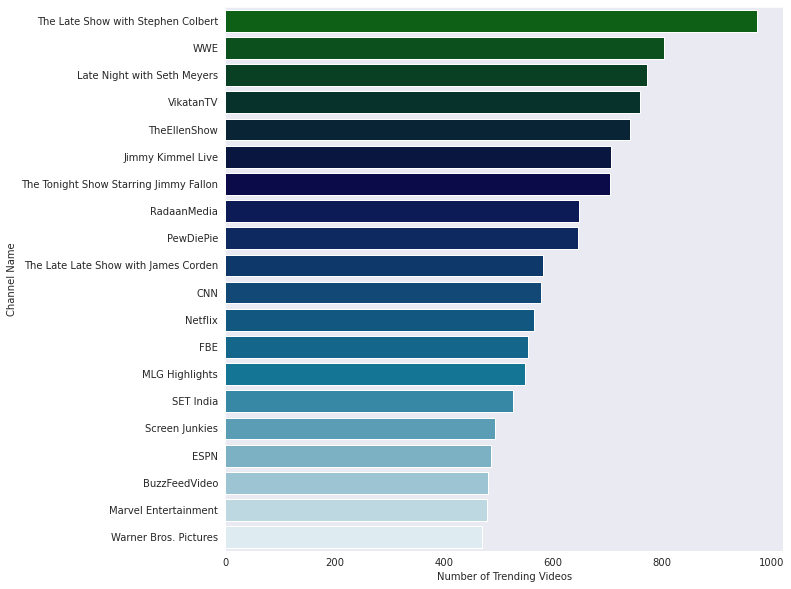

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=channels_head['video_count'], y=channels_head['channel_title'], data=channels_head, palette='ocean')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Channel Name')
plt.show()

**Insight:** What I learned from this graph is that the trending content on youtube seems to be controlled by big media corporations. Nearly every channel in the top 20 (in terms of how many trending videos each channel had) is a big media corporation. Most of them are American corporations, but there are a few Indian ones such as SET India and VikatanTV. The only content creator in the top 20 is PewDiePie, who has always been at the top of YouTube. In my opinion, this graph is very sad to see. A platform that was once all about ordinary content creators seems to have turned into another playground for huge corporations.

## Question 10: Are Different Metrics of Viewer Interaction Correlated?

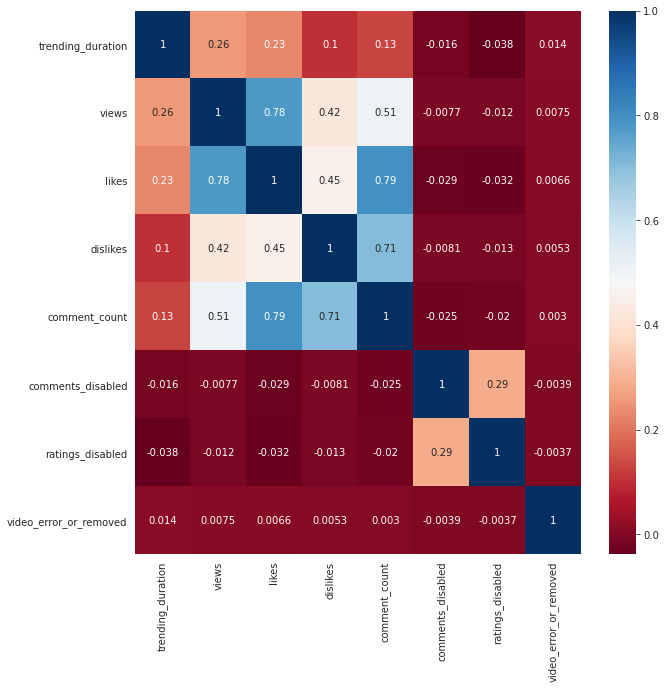

In [ ]:
Metrics = yt_df.drop(['pub_to_trend','pub_to_trend_last'], axis=1)

fig = plt.figure(figsize=(10,10))
sns.heatmap(Metrics.corr(), annot=True, cmap='RdBu')
plt.show()

**Insight:** The heatmap above seems to suggest that in general, most metrics are not correlated. However, there are a few (the blue cluster near the center) that do have a significant correlation. It seems like views and likes are highly correlated, as well as likes and comment count. Interestingly, the correlation between views and dislikes is only about 50% of the correlation between views and likes